In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def load_dataset(name, lable_in_last):
    path = os.path.join("..", "datasets", name)
    data = pd.read_csv(path)
    data = data.values
    if lable_in_last:
        xs = data[:, :-1].astype('float32')
        ys = data[:, -1]
    else:
        xs = data[:, 1:].astype('float32')
        ys = data[:, 0]
    return xs, ys

In [3]:
blobs_x, blobs_y = load_dataset("blobs2.csv", True)

In [4]:
blobs_train_x, blobs_val_x, blobs_train_y, blobs_val_y = train_test_split(
    blobs_x, blobs_y, test_size=0.2)

In [5]:
def get_svm_classifier(xs, ys, kernel, degree=1):
    svm_classifier = SVC(gamma='auto', kernel=kernel, degree=degree)
    svm_classifier.fit(xs, ys)
    return svm_classifier

def get_svm_accuracy(clf, xs, ys):
    return clf.score(xs, ys)

def draw(clf, xs, ys, kernel, deg, name):    
    plt.cla()
    
    delta = 0.025
    xx = np.arange(np.min(xs[:, 0]) - 0.5, np.max(xs[:, 0]) + 0.5, delta)
    yy = np.arange(np.min(xs[:, 1]) - 0.5, np.max(xs[:, 1]) + 0.5, delta)
    xx, yy = np.meshgrid(xx, yy)
    
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    z = clf.decision_function(xy).reshape(xx.shape)
    plt.contour(xx, yy, z, [-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    xs_1 = xs[ys == 0]
    xs_2 = xs[ys == 1]
    plt.plot(xs_1[:, 0], xs_1[:, 1], 'ro', c='b')
    plt.plot(xs_2[:, 0], xs_2[:, 1], 'ro', c='r')
    plt.plot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 'ro', c='g')
    
    plt.title("kernel = {}, degree = {}, accuracy on {} = {:.4f}".format(
        kernel, deg, name, get_svm_accuracy(clf, xs, ys)))
    plt.show()
    
def find_svm_classifier_by_kernel(train_xs, train_ys, val_xs, val_ys, kernel, deg=1):
    clf = get_svm_classifier(train_xs, train_ys, kernel, deg)
    
    draw(clf, train_xs, train_ys, kernel, deg, "train")
    draw(clf, val_xs, val_ys, kernel, deg, "val")

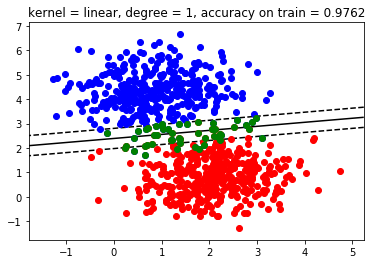

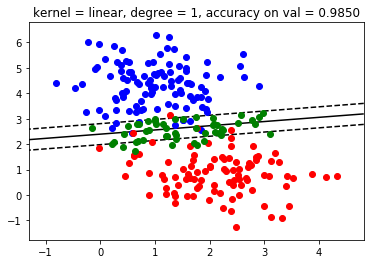

In [6]:
find_svm_classifier_by_kernel(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, "linear")

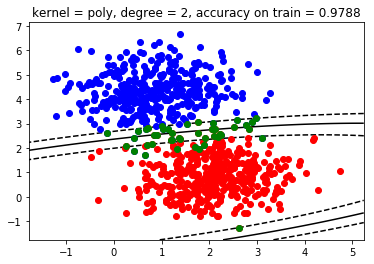

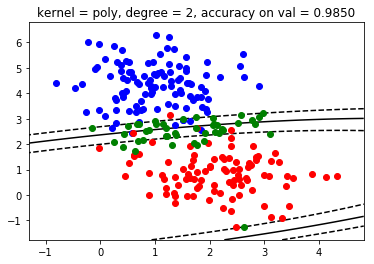

In [7]:
find_svm_classifier_by_kernel(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, "poly", 2)

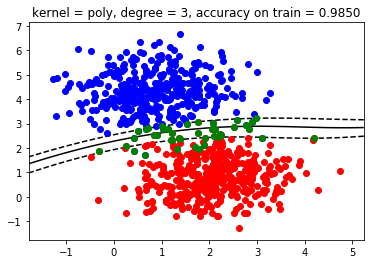

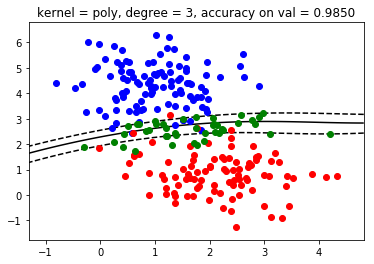

In [8]:
find_svm_classifier_by_kernel(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, "poly", 3)

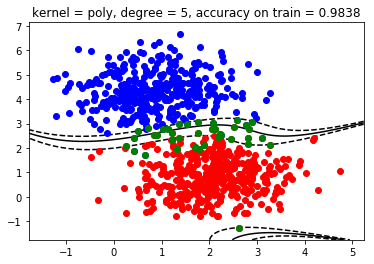

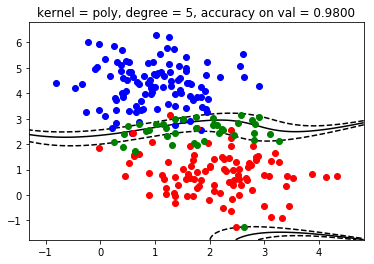

In [9]:
find_svm_classifier_by_kernel(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, "poly", 5)

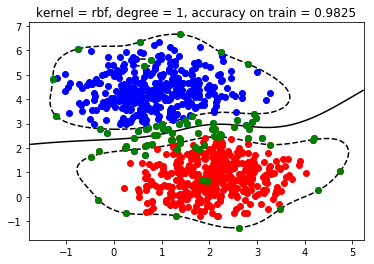

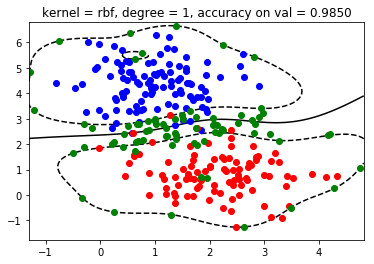

In [10]:
find_svm_classifier_by_kernel(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, "rbf")

In [11]:
spam_x, spam_y = load_dataset("spam.csv", True)
cancer_x, cancer_y = load_dataset("cancer.csv", False)

In [12]:
scaler = MinMaxScaler()
spam_x = scaler.fit_transform(spam_x)
cancer_x = scaler.fit_transform(cancer_x)

In [13]:
spam_train_x, spam_val_x, spam_train_y, spam_val_y = train_test_split(
    spam_x, spam_y, test_size=0.2)
cancer_train_x, cancer_val_x, cancer_train_y, cancer_val_y = train_test_split(
    cancer_x, cancer_y, test_size=0.2)

In [14]:
def get_random_forest_classifier(xs, ys):
    random_forest_classifier = RandomForestClassifier(n_estimators=20)
    random_forest_classifier.fit(xs, ys)
    return random_forest_classifier

def get_random_forest_accuracy(clf, xs, ys):
    ys_p = clf.predict(xs)
    return accuracy_score(ys, ys_p)

def svm_vs_random_forest(train_xs, train_ys, val_xs, val_ys):
    start_time = time.time()
    svm_classifier = get_svm_classifier(train_xs, train_ys, "linear")
    print("SVM time = {}s".format(time.time() - start_time))
    print("SVM train accuracy = {:.4f}".format(
        get_svm_accuracy(svm_classifier, train_xs, train_ys)))
    print("SVM val accuracy = {:.4f}".format(
        get_svm_accuracy(svm_classifier, val_xs, val_ys)))
          
    start_time = time.time()
    random_forest_classifier = get_random_forest_classifier(train_xs, train_ys)
    print("RandomForest time = {}s".format(time.time() - start_time))
    print("RandomForest train accuracy = {:.4f}".format(
        get_random_forest_accuracy(random_forest_classifier, train_xs, train_ys)))
    print("RandomForest val accuracy = {:.4f}".format(
        get_random_forest_accuracy(random_forest_classifier, val_xs, val_ys)))

In [15]:
svm_vs_random_forest(spam_train_x, spam_train_y, spam_val_x, spam_val_y)

SVM time = 0.23302245140075684s
SVM train accuracy = 0.9060
SVM val accuracy = 0.8849
RandomForest time = 0.06413793563842773s
RandomForest train accuracy = 0.9995
RandomForest val accuracy = 0.9414


In [16]:
svm_vs_random_forest(cancer_train_x, cancer_train_y, cancer_val_x, cancer_val_y)

SVM time = 0.0015583038330078125s
SVM train accuracy = 0.9846
SVM val accuracy = 0.9561
RandomForest time = 0.017093658447265625s
RandomForest train accuracy = 1.0000
RandomForest val accuracy = 0.9211
